# Statistical Examples in Python

## Statisical Examples TOC <a class="anchor" id="PyStats_toc"></a>
These examples are divide into 5 parts:

* [Table of Contents](#PyStatsL1_toc)
    * [1. Normality Tests](#PyStats_page_1)
        * [Shapiro-Wilk Test](#PyStats_page_2)
        * [D’Agostino’s K^2 Test](#PyStats_page_3)
        * [Anderson-Darling Test](#PyStats_page_4)
    * [2. Correlation Tests](#PyStats_page_5)
        * [Pearson’s Correlation Coefficient](#PyStats_page_6)
        * [Spearman’s Rank Correlation](#PyStats_page_7)
        * [Kendall’s Rank Correlation](#PyStats_page_8)
        * [Chi-Squared Test](#PyStats_page_9)
    * [3. Stationary Tests](#PyStats_page_10)
        * [Augmented Dickey-Fuller](#PyStats_page_11)
        * [Kwiatkowski-Phillips-Schmidt-Shin](#PyStats_page_12) 
    * [4. Parametric Statistical Hypothesis Tests](#PyStats_page_13)
        * [Student’s t-test](#PyStats_page_14)
        * [Paired Student’s t-test](#PyStats_page_15)
        * [Analysis of Variance Test (ANOVA)](#PyStats_page_16)
        * [Repeated Measures ANOVA Test](#PyStats_page_17)
    * [5. Nonparametric Statistical Hypothesis Tests](#PyStats_page_18)
        * [Mann-Whitney U Test](#PyStats_page_19)
        * [Wilcoxon Signed-Rank Test](#PyStats_page_20)
        * [Kruskal-Wallis H Test](#PyStats_page_21)
        * [Friedman Test](#PyStats_page_22)





<hr style="height:10px;border-width:0;color:gray;background-color:gray">

# 1. Normality Tests<a class="anchor" id="PyStats_page_1"></a>

## This section lists statistical tests that you can use to check if your data has a Gaussian distribution/Normal distribution.

For the normal distribution, the values less than one standard deviation away from the mean account for 68.27% of the set; while two standard deviations from the mean account for 95.45%; and three standard deviations account for 99.73%.

An important decision point when working with a sample of data is whether to use parametric or nonparametric statistical methods.

Parametric statistical methods assume that the data has a known and specific distribution, often a Gaussian distribution. If a data sample is not Gaussian, then the assumptions of parametric statistical tests are violated and nonparametric statistical methods must be used.

There are a range of techniques that you can use to check if your data sample deviates from a Gaussian distribution, called normality tests.



<p style="text-align: center;">
  <img width="600" alt="The Normal Distribution - Gaussian" src="../Media/normal.png">
</p>

[Back to Top](#PyStats_toc)



In [5]:
# generate gaussian data
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))

mean=50.303 stdv=4.426


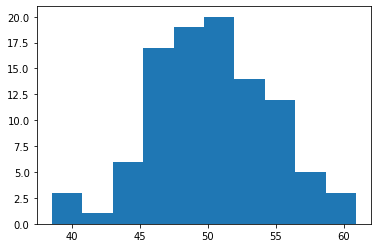

In [6]:
# histogram plot
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# histogram plot
pyplot.hist(data)
pyplot.show()

/usr/local/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


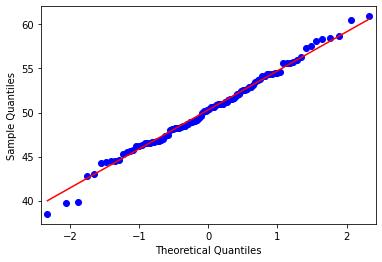

In [7]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# q-q plot
qqplot(data, line='s')
pyplot.show()

## Interpretation of a Test
Before you can apply the statistical tests, you must know how to interpret the results.

Each test will return at least two things:

- Statistic: A quantity calculated by the test that can be interpreted in the context of the test via comparing it to critical values from the distribution of the test statistic.
- p-value: Used to interpret the test, in this case whether the sample was drawn from a Gaussian distribution.

Each test calculates a test-specific statistic. This statistic can aid in the interpretation of the result, although it may require a deeper proficiency with statistics and a deeper knowledge of the specific statistical test. Instead, the p-value can be used to quickly and accurately interpret the statistic in practical applications.

The tests assume that that the sample was drawn from a Gaussian distribution. Technically this is called the null hypothesis, or H0. A threshold level is chosen called alpha, typically 5% (or 0.05), that is used to interpret the p-value.

In the SciPy implementation of these tests, you can interpret the p value as follows.

- p <= alpha: reject H0, not normal.
- p > alpha: fail to reject H0, normal.

This means that, in general, we are seeking results with a larger p-value to confirm that our sample was likely drawn from a Gaussian distribution.

A result above 5% does not mean that the null hypothesis is true. It means that it is very likely true given available evidence. The p-value is not the probability of the data fitting a Gaussian distribution; it can be thought of as a value that helps us interpret the statistical test.

<hr style="height:5px;border-width:0;color:gray;background-color:gray">

# Shapiro-Wilk Test<a class="anchor" id="PyStats_page_2"></a>

[Back to Top](#PyStats_toc)

## Tests whether a data sample has a Gaussian distribution.

### Assumptions

- Observations in each sample are independent and identically distributed (iid).

### Interpretation

- H0: the sample has a Gaussian distribution.
- H1: the sample does not have a Gaussian distribution.

### References

- [A Gentle Introduction to Normality Tests in Python](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/)
- [scipy.stats.shapiro](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)
- [Shapiro-Wilk test on Wikipedia](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test)
- [Normal Distribution - Wolfram](https://mathworld.wolfram.com/NormalDistribution.html)



In [45]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.895, p=0.193
Probably Gaussian


<hr style="height:5px;border-width:0;color:gray;background-color:gray">

# D’Agostino’s K^2 Test<a class="anchor" id="PyStats_page_3"></a>

[Back to Top](#PyStats_toc)


## Tests whether a data sample has a Gaussian distribution.

### Assumptions
- Observations in each sample are independent and identically distributed (iid).

### Interpretation
- H0: the sample has a Gaussian distribution.
- H1: the sample does not have a Gaussian distribution.

### References
- [A Gentle Introduction to Normality Tests in Python](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/)
- [scipy.stats.normaltest](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html)
- [D’Agostino’s K-squared test on Wikipedia](https://en.wikipedia.org/wiki/D%27Agostino%27s_K-squared_test)



In [46]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=3.392, p=0.183
Probably Gaussian


/usr/local/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<hr style="height:5px;border-width:0;color:gray;background-color:gray">

# Anderson-Darling Test<a class="anchor" id="PyStats_page_4"></a>

[Back to Top](#PyStats_toc)

## Tests whether a data sample has a Gaussian distribution.

### Assumptions
- Observations in each sample are independent and identically distributed (iid).

### Interpretation
- H0: the sample has a Gaussian distribution.
- H1: the sample does not have a Gaussian distribution.

### References
- [A Gentle Introduction to Normality Tests in Python](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/)
- [scipy.stats.anderson](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html)
- [Anderson-Darling test on Wikipedia](https://en.wikipedia.org/wiki/Anderson%E2%80%93Darling_test)



In [28]:
# Example of the Anderson-Darling Normality Test
from scipy.stats import anderson
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < cv:
		print('Probably Gaussian at the %.1f%% level' % (sl))
	else:
		print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=0.424
Probably Gaussian at the 15.0% level
Probably Gaussian at the 10.0% level
Probably Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


<hr style="height:10px;border-width:0;color:gray;background-color:gray">

# 2. Correlation Tests<a class="anchor" id="PyStats_page_5"></a>

## This section lists statistical tests that you can use to check if two samples are related.

[Back to Top](#PyStats_toc)



<hr style="height:5px;border-width:0;color:gray;background-color:gray">

# Pearson’s Correlation Coefficient<a class="anchor" id="PyStats_page_6"></a>

[Back to Top](#PyStats_toc)

Tests whether two samples have a linear relationship.

## Assumptions

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample are normally distributed.
- Observations in each sample have the same variance.

## Interpretation

- H0: the two samples are independent.
- H1: there is a dependency between the samples.

## References

- [How to Calculate Correlation Between Variables in Python](https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/)
- [scipy.stats.pearsonr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html)
- [Pearson’s correlation coefficient on Wikipedia](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)
- [Wolfram](https://mathworld.wolfram.com/CorrelationCoefficient.html)

In [29]:
# Example of the Pearson's Correlation test
from scipy.stats import pearsonr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.688, p=0.028
Probably dependent


<hr style="height:5px;border-width:0;color:gray;background-color:gray">

# Spearman’s Rank Correlation<a class="anchor" id="PyStats_page_7"></a>

[Back to Top](#PyStats_toc)

Tests whether two samples have a monotonic relationship.

## Assumptions

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample can be ranked.

## Interpretation

- H0: the two samples are independent.
- H1: there is a dependency between the samples.

## References

- [How to Calculate Nonparametric Rank Correlation in Python](https://machinelearningmastery.com/how-to-calculate-nonparametric-rank-correlation-in-python/)
- [scipy.stats.spearmanr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html)
- [Spearman’s rank correlation coefficient on Wikipedia](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient)
- [Wolfram](https://mathworld.wolfram.com/SpearmanRankCorrelationCoefficient.html)

In [30]:
# Example of the Spearman's Rank Correlation Test
from scipy.stats import spearmanr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.855, p=0.002
Probably dependent


<hr style="height:5px;border-width:0;color:gray;background-color:gray">

# Kendall’s Rank Correlation<a class="anchor" id="PyStats_page_8"></a>

[Back to Top](#PyStats_toc)

Tests whether two samples have a monotonic relationship.

## Assumptions

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample can be ranked.

## Interpretation

- H0: the two samples are independent.
- H1: there is a dependency between the samples.

## References

- [How to Calculate Nonparametric Rank Correlation in Python](https://machinelearningmastery.com/how-to-calculate-nonparametric-rank-correlation-in-python/)
- [scipy.stats.kendalltau](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html)
- [Kendall rank correlation coefficient on Wikipedia](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient)
- [Towards Data Science](https://towardsdatascience.com/kendall-rank-correlation-explained-dee01d99c535)
- [Statistics Howto](https://www.statisticshowto.com/kendalls-tau/)




In [31]:
# Example of the Kendall's Rank Correlation Test
from scipy.stats import kendalltau
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.733, p=0.002
Probably dependent


<hr style="height:5px;border-width:0;color:gray;background-color:gray">

# Chi-Squared Test<a class="anchor" id="PyStats_page_9"></a>

[Back to Top](#PyStats_toc)

Tests whether two categorical variables are related or independent.

## Assumptions

- Observations used in the calculation of the contingency table are independent.
- 25 or more examples in each cell of the contingency table.

## Interpretation

- H0: the two samples are independent.
- H1: there is a dependency between the samples.

## References
- [A Gentle Introduction to the Chi-Squared Test for Machine Learning](https://machinelearningmastery.com/chi-squared-test-for-machine-learning/)
- [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html)
- [Chi-Squared test on Wikipedia](https://en.wikipedia.org/wiki/Chi-squared_test)
- [Wolfram](https://mathworld.wolfram.com/Chi-SquaredTest.html)

In [32]:
# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency
table = [[10, 20, 30],[6,  9,  17]]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.272, p=0.873
Probably independent


<hr style="height:10px;border-width:0;color:gray;background-color:gray">

# 3. Stationary Tests<a class="anchor" id="PyStats_page_10"></a>

## This section lists statistical tests that you can use to check if a time series is stationary or not.

[Back to Top](#PyStats_toc)

<hr style="height:10px;border-width:0;color:gray;background-color:gray">

<hr style="height:5px;border-width:0;color:gray;background-color:gray">

# Augmented Dickey-Fuller<a class="anchor" id="PyStats_page_11"></a>

[Back to Top](#PyStats_toc)

## Tests whether a time series has a unit root, e.g. has a trend or more generally is autoregressive.

## Assumptions

- Observations in are temporally ordered.

## Interpretation

- H0: a unit root is present (series is non-stationary).
- H1: a unit root is not present (series is stationary).

## References
- [How to Check if Time Series Data is Stationary with Python](https://machinelearningmastery.com/time-series-data-stationary-python/)
- [statsmodels.tsa.stattools.adfuller API](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html)
- [Augmented Dickey–Fuller test, Wikipedia](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test)
- [Statistics Howto](https://www.statisticshowto.com/adf-augmented-dickey-fuller-test/)


In [33]:
# Example of the Augmented Dickey-Fuller unit root test
from statsmodels.tsa.stattools import adfuller
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
stat, p, lags, obs, crit, t = adfuller(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably not Stationary')
else:
	print('Probably Stationary')

stat=0.517, p=0.985
Probably not Stationary


<hr style="height:5px;border-width:0;color:gray;background-color:gray">

# Kwiatkowski-Phillips-Schmidt-Shin<a class="anchor" id="PyStats_page_12"></a>

[Back to Top](#PyStats_toc)

## Tests whether a time series is trend stationary or not.

## Assumptions

- Observations in are temporally ordered.

## Interpretation

- H0: the time series is trend-stationary.
- H1: the time series is not trend-stationary.

## References
- [statsmodels.tsa.stattools.kpss API](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.kpss.html#statsmodels.tsa.stattools.kpss)
- [KPSS test, Wikipedia](https://en.wikipedia.org/wiki/KPSS_test)
- [JSTOR](https://www.jstor.org/stable/23243736)
- [Statistics How To](https://www.statisticshowto.com/kpss-test/)

In [34]:
# Example of the Kwiatkowski-Phillips-Schmidt-Shin test
from statsmodels.tsa.stattools import kpss
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
stat, p, lags, crit = kpss(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Stationary')
else:
	print('Probably not Stationary')

stat=0.410, p=0.073
Probably Stationary


/usr/local/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


<hr style="height:10px;border-width:0;color:gray;background-color:gray">

# 4. Parametric Statistical Hypothesis Tests<a class="anchor" id="PyStats_page_13"></a>

A parametric test is preferred because it has better ability to distinguish between the two arms. In other words, it is better at highlighting the weirdness of the distribution. Nonparametric tests are about 95% as powerful as parametric tests. However, nonparametric tests are often necessary.

[Back to Top](#PyStats_toc)

<hr style="height:10px;border-width:0;color:gray;background-color:gray">

# Student’s t-test<a class="anchor" id="PyStats_page_14"></a>

[Back to Top](#PyStats_toc)

## Tests whether the means of two independent samples are significantly different.

## Assumptions

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample are normally distributed.
- Observations in each sample have the same variance.

## Interpretation

- H0: the means of the samples are equal.
- H1: the means of the samples are unequal.


## References
- [How to Calculate Parametric Statistical Hypothesis Tests in Python]()
- [scipy.stats.ttest_ind]()
- [Student’s t-test on Wikipedia]()
- [Wolfram](https://mathworld.wolfram.com/Studentst-Distribution.html)



In [1]:
# Example of the Student's t-test
from scipy.stats import ttest_ind
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-0.326, p=0.748
Probably the same distribution


<hr style="height:10px;border-width:0;color:gray;background-color:gray">

# Paired Student’s t-test<a class="anchor" id="PyStats_page_15"></a>

[Back to Top](#PyStats_toc)

## Tests whether the means of two paired samples are significantly different.

## Assumptions

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample are normally distributed.
- Observations in each sample have the same variance.
- Observations across each sample are paired.

## Interpretation

- H0: the means of the samples are equal.
- H1: the means of the samples are unequal.

## References
- [How to Calculate Parametric Statistical Hypothesis Tests in Python](https://machinelearningmastery.com/parametric-statistical-significance-tests-in-python/)
- [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html)
- [Student’s t-test on Wikipedia](https://en.wikipedia.org/wiki/Student%27s_t-test)
- [Wolfram](https://mathworld.wolfram.com/Pairedt-Test.html)


In [36]:
# Example of the Paired Student's t-test
from scipy.stats import ttest_rel
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-0.334, p=0.746
Probably the same distribution


<hr style="height:5px;border-width:0;color:gray;background-color:gray">

# Analysis of Variance Test (ANOVA)<a class="anchor" id="PyStats_page_16"></a>

[Back to Top](#PyStats_toc)

## Tests whether the means of two or more independent samples are significantly different.

## Assumptions

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample are normally distributed.
- Observations in each sample have the same variance.

## Interpretation

- H0: the means of the samples are equal.
- H1: one or more of the means of the samples are unequal.

## References
- [How to Calculate Parametric Statistical Hypothesis Tests in Python](https://machinelearningmastery.com/parametric-statistical-significance-tests-in-python/)
- [scipy.stats.f_oneway](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html)
- [Analysis of variance on Wikipedia](https://en.wikipedia.org/wiki/Analysis_of_variance)
- [Wolfram](https://reference.wolfram.com/language/ANOVA/tutorial/ANOVA.html)


In [37]:
# Example of the Analysis of Variance Test
from scipy.stats import f_oneway
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.096, p=0.908
Probably the same distribution


<hr style="height:10px;border-width:0;color:gray;background-color:gray">

# Repeated Measures ANOVA Test<a class="anchor" id="PyStats_page_17"></a>

[Back to Top](#PyStats_toc)

## Tests whether the means of two or more paired samples are significantly different.

## Assumptions

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample are normally distributed.
- Observations in each sample have the same variance.
- Observations across each sample are paired.

## Interpretation

- H0: the means of the samples are equal.
- H1: one or more of the means of the samples are unequal.

## References
- [How to Calculate Parametric Statistical Hypothesis Tests in Python](https://machinelearningmastery.com/parametric-statistical-significance-tests-in-python/)
- [Analysis of variance on Wikipedia](https://en.wikipedia.org/wiki/Analysis_of_variance)
- [Statology](https://www.statology.org/repeated-measures-anova-python/)
- [Wolfram](https://mathematica.stackexchange.com/questions/7736/using-anova-with-a-repeated-measures-within-subjects-design)


In [38]:
# Repeated Measures ANOVA Test example
import numpy as np
import pandas as pd

#create data
df = pd.DataFrame({'patient': np.repeat([1, 2, 3, 4, 5], 4),
                   'drug': np.tile([1, 2, 3, 4], 5),
                   'response': [30, 28, 16, 34,
                                14, 18, 10, 22,
                                24, 20, 18, 30,
                                38, 34, 20, 44, 
                                26, 28, 14, 30]})

In [39]:
#view first ten rows of data 
df.head(10)

,patient,drug,response
0,1,1,30
1,1,2,28
2,1,3,16
3,1,4,34
4,2,1,14
5,2,2,18
6,2,3,10
7,2,4,22
8,3,1,24
9,3,2,20


In [40]:
from statsmodels.stats.anova import AnovaRM

#perform the repeated measures ANOVA
print(AnovaRM(data=df, depvar='response', subject='patient', within=['drug']).fit())

              Anova
     F Value Num DF  Den DF Pr > F
----------------------------------
drug 24.7589 3.0000 12.0000 0.0000



## Interpret the results

A repeated measures ANOVA uses the following null and alternative hypotheses:

The null hypothesis (H0): µ1 = µ2 = µ3 (the population means are all equal)

The alternative hypothesis: (Ha): at least one population mean is different from the rest

In this example, the F test-statistic is 24.7589 and the corresponding p-value is 0.0000. Since this p-value is less than 0.05, we reject the null hypothesis and conclude that there is a statistically significant difference in mean response times between the four drugs.

## Report the results

Lastly, we will report the results of our repeated measures ANOVA. Here is an example of how to do so:

A one-way repeated measures ANOVA was conducted on 5 individuals to examine the effect that four different drugs had on response time.

Results showed that the type of drug used lead to statistically significant differences in response time (F(3, 12) = 24.75887, p < 0.001).

<hr style="height:10px;border-width:0;color:gray;background-color:gray">

# 5. Nonparametric Statistical Hypothesis Tests<a class="anchor" id="PyStats_page_18"></a>

[Back to Top](#PyStats_toc)

<hr style="height:10px;border-width:0;color:gray;background-color:gray">

<hr style="height:5px;border-width:0;color:gray;background-color:gray">

# Mann-Whitney U Test<a class="anchor" id="PyStats_page_19"></a>

[Back to Top](#PyStats_toc)

## Tests whether the distributions of two independent samples are equal or not.

## Assumptions

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample can be ranked.

## Interpretation

- H0: the distributions of both samples are equal.
- H1: the distributions of both samples are not equal.

## References
- [How to Calculate Nonparametric Statistical Hypothesis Tests in Python](https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/)
- [scipy.stats.mannwhitneyu](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html)
- [Mann-Whitney U test on Wikipedia](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test)
- [Wolfram](https://reference.wolfram.com/language/ref/MannWhitneyTest.html)

In [41]:
# Example of the Mann-Whitney U Test
from scipy.stats import mannwhitneyu
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = mannwhitneyu(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=40.000, p=0.473
Probably the same distribution


<hr style="height:5px;border-width:0;color:gray;background-color:gray">

# Wilcoxon Signed-Rank Test<a class="anchor" id="PyStats_page_20"></a>

[Back to Top](#PyStats_toc)

## Tests whether the distributions of two paired samples are equal or not.

## Assumptions

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample can be ranked.
- Observations across each sample are paired.

## Interpretation

- H0: the distributions of both samples are equal.
- H1: the distributions of both samples are not equal.

## References
- [How to Calculate Nonparametric Statistical Hypothesis Tests in Python](https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/)
- [scipy.stats.wilcoxon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html)
- [Wilcoxon signed-rank test on Wikipedia](https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test)
- [Wolfram](https://mathworld.wolfram.com/WilcoxonSignedRankTest.html)

In [42]:
# Example of the Wilcoxon Signed-Rank Test
from scipy.stats import wilcoxon
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = wilcoxon(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=21.000, p=0.557
Probably the same distribution


<hr style="height:5px;border-width:0;color:gray;background-color:gray">

# Kruskal-Wallis H Test<a class="anchor" id="PyStats_page_21"></a>

[Back to Top](#PyStats_toc)

## Tests whether the distributions of two or more independent samples are equal or not.

## Assumptions

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample can be ranked.

## Interpretation

- H0: the distributions of all samples are equal.
- H1: the distributions of one or more samples are not equal.

## References
- [How to Calculate Nonparametric Statistical Hypothesis Tests in Python](https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/)
- [scipy.stats.kruskal](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html)
- [Kruskal-Wallis one-way analysis of variance on Wikipedia](https://en.wikipedia.org/wiki/Kruskal%E2%80%93Wallis_one-way_analysis_of_variance)
- [Wolfram](https://mathworld.wolfram.com/Kruskal-WallisTest.html)

In [43]:
# Example of the Kruskal-Wallis H Test
from scipy.stats import kruskal
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = kruskal(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.571, p=0.450
Probably the same distribution


<hr style="height:5px;border-width:0;color:gray;background-color:gray">

# Friedman Test<a class="anchor" id="PyStats_page_22"></a>

[Back to Top](#PyStats_toc)

## Tests whether the distributions of two or more paired samples are equal or not.

## Assumptions

- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample can be ranked.
- Observations across each sample are paired.

## Interpretation

- H0: the distributions of all samples are equal.
- H1: the distributions of one or more samples are not equal.

## References
- [How to Calculate Nonparametric Statistical Hypothesis Tests in Python](https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/)
- [scipy.stats.friedmanchisquare](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html)
- [Friedman test on Wikipedia](https://en.wikipedia.org/wiki/Friedman_test)
- [Wolfram](https://reference.wolfram.com/language/ref/LocationEquivalenceTest.html)

In [44]:
# Example of the Friedman Test
from scipy.stats import friedmanchisquare
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = friedmanchisquare(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.800, p=0.670
Probably the same distribution


<hr style="height:10px;border-width:0;color:gray;background-color:gray">

# Further Reading

[Back to Top](#PyStats_toc)

- [A Gentle Introduction to Normality Tests in Python](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/)
- [How to Use Correlation to Understand the Relationship Between Variables](https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/)
- [How to Use Parametric Statistical Significance Tests in Python](https://machinelearningmastery.com/parametric-statistical-significance-tests-in-python/)
- [A Gentle Introduction to Statistical Hypothesis Tests](https://machinelearningmastery.com/statistical-hypothesis-tests/)